In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import Counter


## kNN formula

$$
y = \text{argmax}_c \sum_{i=1}^{k} 1 \left\{ y_i = c \right\}
$$

## kNN implementation 1

In [3]:
class KNN:

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
        if len(y.shape) != 1:
            self.y = self.y.reshape(-1)
        self.classes = len(set(self.y))

    def predict(self, X):
        
        result = []

        if len(X.shape) == 1:
            X = X.reshape(1, -1)

        for x1 in X:

            distances = []

            for i in range(len(self.X)):
                distances.append((self.euclidean_distance(x1, self.X[i]), self.y[i]))
            
            distances.sort(key=lambda x: x[0])
            distances = distances[:self.k]

            vote = [0 for x in range(self.classes)]

            for j in distances:
                for k in range(self.classes):
                    if j[1] == k:
                        vote[k] += 1

            winner = np.argmax(np.array(vote))

            result.append(winner)
            
        return np.array(result)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum( (x1 - x2) ** 2 ))

## kNN implementation 2

In [4]:
class KNN2:

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
        if len(y.shape) != 1:
            self.y = self.y.reshape(-1)

    def predict(self, X):
        result = [self._predict(x) for x in X]
        return np.array(result)
    
    def _predict(self, x):

        distances = [self.euclidean_distance(x, x_train) for x_train in self.X]
        k_indices = np.argsort(distances)[:self.k]
        neighbors = self.y[k_indices]
        most_common = Counter(neighbors).most_common(1)
        return most_common[0][0]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum( (x1 - x2) ** 2 ))


In [5]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Simple dataset

Accuracy: 1.0


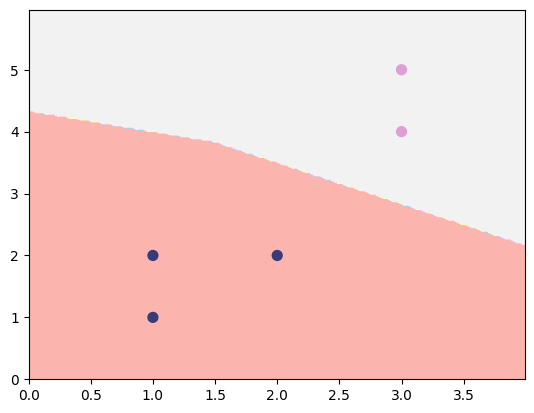

In [6]:
X = np.array([[1, 1],
              [1, 2],
              [2, 2],
              [3, 5],
              [3, 4]])
y = np.array([[0], [0], [0], [1], [1]])

model = KNN(3)
model.fit(X, y)

print(f'Accuracy: {np.mean(model.predict(X) == y.reshape(-1))}')
plot_2d_clf_problem(X, y, model.predict)


## Complex dataset

Accuracy: 0.93


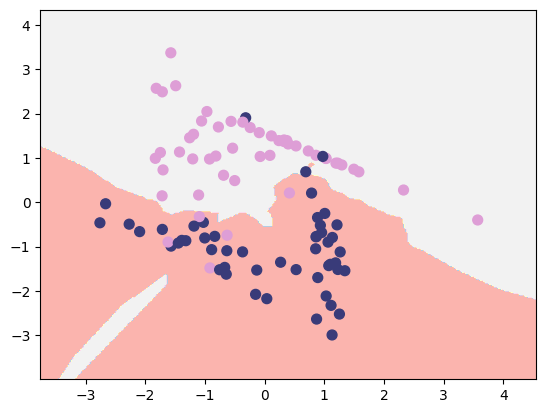

In [8]:
X_100, y_100 = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)
model.fit(X_100, y_100)

print(f'Accuracy: {np.mean(model.predict(X_100) == y_100.reshape(-1))}')
plot_2d_clf_problem(X_100, y_100, model.predict)

Accuracy: 1.0


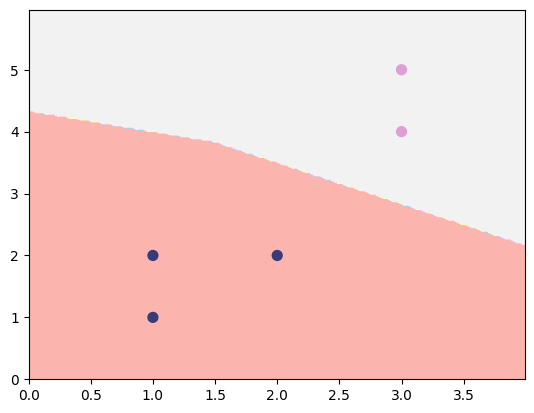

In [11]:
model2 = KNN2(3)
model2.fit(X, y)

print(f'Accuracy: {np.mean(model2.predict(X) == y.reshape(-1))}')
plot_2d_clf_problem(X, y, model2.predict)

Accuracy: 0.93


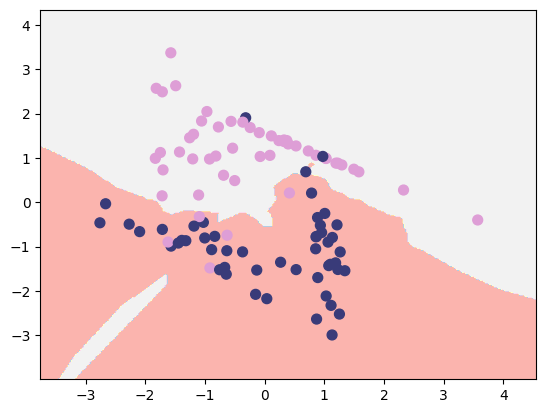

In [10]:
model2.fit(X_100, y_100)
print(f'Accuracy: {np.mean(model2.predict(X_100) == y_100.reshape(-1))}')
plot_2d_clf_problem(X_100, y_100, model2.predict)